In [1]:
import pandas
import cv2
from mpl_toolkits.mplot3d import Axes3D

apple_data_location = "/iliad2/u/jmeribe/projects/vlm-scaffolding/varying_apple_params.csv"

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Video, display
import os

In [2]:
apple_df = pd.read_csv(apple_data_location)
apple_df.head(10)

,friction,density,center_of_mass,scale,max_contact_force,success_rate
0,0.01 0 0,NaN,NaN,NaN,-2431.8174 5022.6743 6944.397,0.950
1,0.02 0 0,NaN,NaN,NaN,-2781.031 253.50186 -5741.348,0.931
2,0.03 0 0,NaN,NaN,NaN,-3846.3604 -33.939735 -7225.048,0.936
3,0.04 0 0,NaN,NaN,NaN,668.4535 -2621.6626 -5214.643,0.943
4,0.05 0 0,NaN,NaN,NaN,-1318.8429 -2594.3325 -5857.198,0.942
5,0.1 0 0,NaN,NaN,NaN,-2372.3662 -1718.6743 -5248.707,0.955
6,0.2 0 0,NaN,NaN,NaN,-1553.9352 -3724.0984 -5756.239,0.963
7,0.3 0 0,NaN,NaN,NaN,-601.0554 -5064.7344 -2755.0515,0.956
8,0.4 0 0,NaN,NaN,NaN,-1560.0071 -6101.733 -509.81445,0.970
9,0.5 0 0,NaN,NaN,NaN,10451.619 -1741.5686 -11772.067,0.973


In [3]:
apple_friction_df = apple_df[["friction", "success_rate", "max_contact_force"]]
apple_friction_df = apple_friction_df[apple_friction_df["friction"].notna()]

apple_friction_df.head(5)

,friction,success_rate,max_contact_force
0,0.01 0 0,0.950,-2431.8174 5022.6743 6944.397
1,0.02 0 0,0.931,-2781.031 253.50186 -5741.348
2,0.03 0 0,0.936,-3846.3604 -33.939735 -7225.048
3,0.04 0 0,0.943,668.4535 -2621.6626 -5214.643
4,0.05 0 0,0.942,-1318.8429 -2594.3325 -5857.198


In [4]:
apple_density_df = apple_df[["density", "success_rate", "max_contact_force"]]
apple_density_df = apple_density_df[apple_density_df["density"].notna()]

apple_density_df.head(5)

,density,success_rate,max_contact_force
28,250.0,0.021,-46790.01 -32336.695 -337051.
29,500.0,0.330,-4899.1016 -2077.0635 -5054.006
30,750.0,0.904,-4213.602 -368.75476 -6327.7495
31,1000.0,0.943,-10439.036 35085.066 -42888.297
32,1250.0,0.924,572.65094 -186.58418 -7793.7236


In [5]:
apple_com_df = apple_df[["center_of_mass", "success_rate", "max_contact_force"]]
apple_com_df = apple_com_df[apple_com_df["center_of_mass"].notna()]

apple_com_df.head(5)

,center_of_mass,success_rate,max_contact_force
44,0.0 0.0 0.0,0.753,-1716.2134 -5526.2026 -5233.8047
45,-0.03 0.03 0.03,0.775,-4534.057 9450.805 -5461.748
46,-0.03 -0.03 0.03,0.481,-3376.503 -2171.7695 -8992.715
47,-0.03 0.03 -0.03,0.797,-5102.1035 -2127.5461 -9273.305
48,0.03 -0.03 -0.03,0.806,-1417.4916 -5755.465 -8104.6704


In [6]:
apple_scale_df = apple_df[["scale", "success_rate", "max_contact_force"]]
apple_scale_df = apple_scale_df[apple_scale_df["scale"].notna()]

apple_scale_df.head(5)

,scale,success_rate,max_contact_force
159,0.50,0.000,-1552.6798 -732.3599 822.7758
160,0.75,0.014,-4243.5273 -804.8979 -11638.783
161,1.00,0.340,6105.6963 382.7815 -5309.227
162,1.25,0.921,-1198.5857 4477.4883 -7032.316
163,1.50,0.943,-10439.036 35085.06 -42888.297


In [10]:
apple_df[(apple_df["success_rate"] > 0.40) & (apple_df["success_rate"] < 0.6)]

,friction,density,center_of_mass,scale,max_contact_force,success_rate
39,NaN,12500.0,NaN,NaN,-5557.151 -3668.2913 1948.9912,0.500
40,NaN,15000.0,NaN,NaN,6507.2866 3335.9534 2263.8486,0.403
46,NaN,NaN,-0.03 -0.03 0.03,NaN,-3376.503 -2171.7695 -8992.715,0.481
52,NaN,NaN,-0.02 0.02 -0.02,NaN,-326.9819 -4067.8145 -6432.4336,0.445
62,NaN,NaN,-0.1 0.1 -0.1,NaN,-1259.1317 -2963.6062 -8394.7,0.485
88,NaN,NaN,0.0 -0.03 0.03,NaN,364.21884 -7764.659 -4848.899,0.444
99,NaN,NaN,0.05 -0.05 0.0,NaN,-4178.2954 -1505.2546 -5390.3594,0.580
135,NaN,NaN,0.05 0.0 0.0,NaN,-4824.305 -2195.5437 -7434.989,0.466
138,NaN,NaN,0.0 -0.05 0.0,NaN,-129.13017 -685.0344 -3971.8765,0.457
152,NaN,NaN,0.0 0.0 -0.50,NaN,-11955.304 -1433.9482 3018.395,0.502


In [ ]:
def scatter_plot(title, points, x_label, y_label):
    fig, ax = plt.subplots(figsize=(6, 4))
    x, y = zip(*points)
    ax.scatter(x, y, s=30, edgecolor='black', linewidth=0.5, alpha=0.8)
    ax.set_title(title, fontsize=14, weight='bold', pad=12)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()
    plt.show()


def scatter_plot_3d(title, points, x_label, y_label, z_label, c_label="Success Rate"):
    fig = plt.figure(figsize=(24,8))
    ax = fig.add_subplot(111, projection='3d')

    x, y, z, c = zip(*points)

    scatter = ax.scatter(x, y, z, c=c, cmap='viridis', s=30, edgecolor='black', linewidth=0.5, alpha=0.8)

    ax.set_title(title, fontsize=14, weight='bold', pad=12)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_zlabel(z_label, fontsize=12)

    fig.colorbar(scatter, ax=ax, label=c_label, shrink=0.6, aspect=12, pad=0.1)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

def play_video_jupyter(video_path, width=640, height=480, embed=True):
    if not os.path.exists(video_path):
        print(f"Error: File not found: {video_path}")
        return
    display(Video(video_path, width=width, height=height, embed=embed))

In [ ]:
friction_points = map(lambda tup: (float(tup[0].split()[0]), float(tup[1])), apple_friction_df[["friction", "success_rate"]].itertuples(index=False, name=None))
friction_points = filter(lambda x: x[0] < 2.0 ,friction_points)

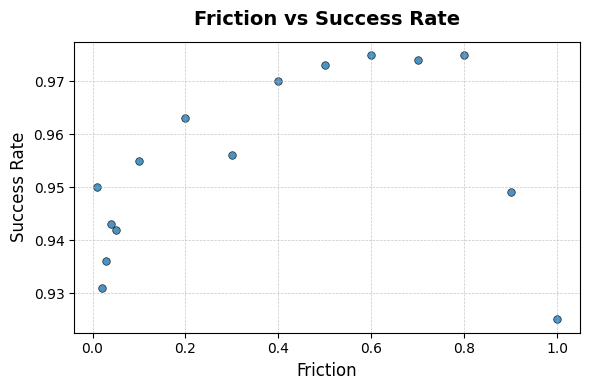

In [ ]:
scatter_plot("Friction vs Success Rate", friction_points, "Friction", "Success Rate")

In [ ]:
scale_points = map(lambda tup: (float(tup[0]), float(tup[1])), apple_scale_df[["scale", "success_rate"]].itertuples(index=False, name=None))

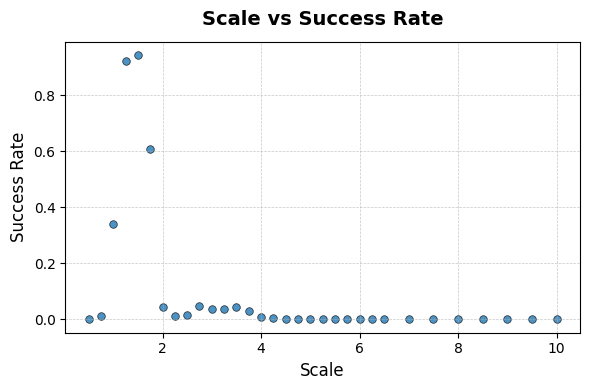

In [ ]:
scatter_plot("Scale vs Success Rate", scale_points, "Scale", "Success Rate")

In [ ]:
density_points = map(lambda tup: (float(tup[0]), float(tup[1])), apple_density_df[["density", "success_rate"]].itertuples(index=False, name=None))

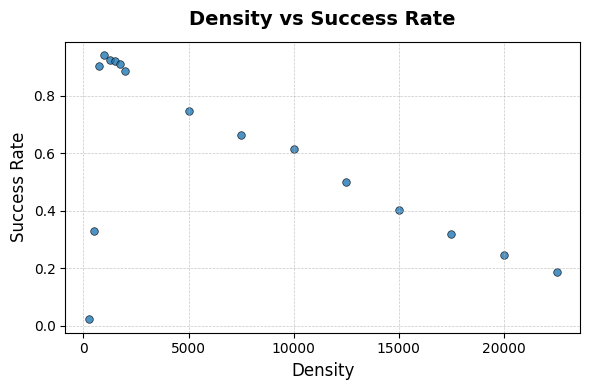

In [ ]:
scatter_plot("Density vs Success Rate", density_points, "Density", "Success Rate")

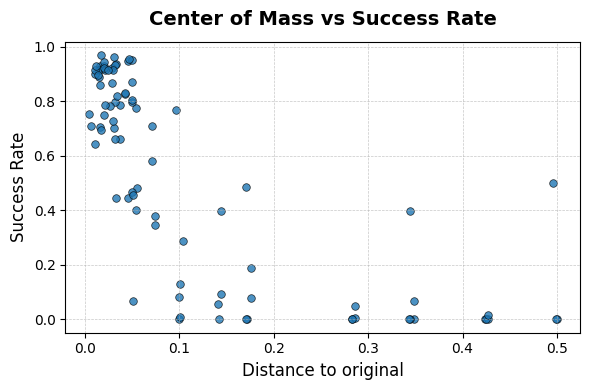

In [ ]:
original_com = np.array([0.00029322,  0.00045218, -0.00379098])
com_points = map(lambda tup: (np.linalg.norm(np.array(list(map(float, tup[0].split()))) - original_com).astype(float), float(tup[1])), apple_com_df[["center_of_mass", "success_rate"]].itertuples(index=False, name=None))

com_points = filter(lambda tup: tup[0] < 0.5, com_points)
scatter_plot("Center of Mass vs Success Rate", com_points, "Distance to original", "Success Rate")